# NLP. Week 4. Language models. N-grams

## Recap 

* Language models offer a way to assign a probability to a sentence or other sequence of words, and to predict a word from preceding words.

* **n-grams** are Markov models that estimate words from a fixed window of previous words. n-gram probabilities can be estimated by counting in a corpus and normalizing (the maximum likelihood estimate)

* **n-gram** language models are evaluated extrinsically in some task, or intrinsically using perplexity

    ### A language model learns to predict the probability of a sequence of words.
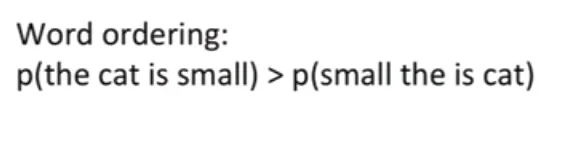

## Types of Language Models
There are primarily two types of Language Models:

1. Statistical Language Models: These models use traditional statistical techniques like N-grams, Hidden Markov Models (HMM) and certain linguistic rules to learn the probability distribution of words
2. Neural Language Models: These use different kinds of Neural Networks to model language


# Statistical Language Model

### N-gram

> An N-gram is a sequence of N tokens (or words)

#### Example 

Consider the following sentence: `“Innopolis University is a university located in the city of Innopolis.”`

* A 1-gram (or unigram) is a one-word sequence. For the above sentence, the unigrams would simply be: “Innopolis“,  “University“, “is“, “a“, “university“, “located“, “in“, “the“, “city“, “of“, “Innopolis“.

* A 2-gram (or bigram) is a two-word sequence of words, like “Innopolis University”, “university located”, or “located in”.


### Model

> If we have a good N-gram model, we can predict `p(w | h)` — what is the probability of seeing the word w given a history of previous words `h` — where the history contains `n-1` words.

Probability of a sentence after applying chain rule:
$$ P(x_0...x_m) = P(x_0) * P(x_1|x_0) * P(x_2|x_0x_1) ... = \prod_0^{m-1}{P(x_i|x_0...x_{i-1})} \text{, where } m \text{ - the sentence length.}$$ 

N-gram model simplifies this by limiting the preceding text to length N:

$$ P(x_m|x_0...x_{m-1}) \approx P(x_m|x_{m-n}...x_{m-1})$$

## Model implementation

In [1]:
# for those of you who run locally
import nltk

nltk.download('reuters', quiet=True)

True

In [2]:
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in reuters.sents():
    lower_sentence = [word.lower() for word in sentence]
    for word1, word2, word3 in trigrams(lower_sentence, pad_right=True, pad_left=True):
        model[(word1, word2)][word3] += 1

# Let's transform the counts to probabilities
for word1_word2 in model:
    total_count = float(sum(model[word1_word2].values()))
    for word3 in model[word1_word2]:
        model[word1_word2][word3] /= total_count

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\timdi/nltk_data'
    - 'C:\\Users\\timdi\\anaconda3\\envs\\DS\\nltk_data'
    - 'C:\\Users\\timdi\\anaconda3\\envs\\DS\\share\\nltk_data'
    - 'C:\\Users\\timdi\\anaconda3\\envs\\DS\\lib\\nltk_data'
    - 'C:\\Users\\timdi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
import random

# starting words
text = ["today", "the"]
sentence_finished = False

while not sentence_finished:
    # select a random probability threshold  
    probability_threshold = random.random()
    accumulator = .0

    for word in model[tuple(text[-2:])].keys():
        accumulator += model[tuple(text[-2:])][word]

        # select words that are above the probability threshold
        if accumulator >= probability_threshold:
            text.append(word)
            break

    if text[-2:] == [None, None]:
        sentence_finished = True

print(' '.join([t for t in text if t]))

## Alternative model implementation

In [5]:
import string
from nltk.corpus import stopwords
from nltk import FreqDist


#  remove the n-grams with removable words
def remove_stopwords(ngrams, removal_list):
    y = []
    for pair in ngrams:
        count = 0
        for word in pair:
            if word in removal_list:
                count = count or 0
            else:
                count = count or 1
        if count == 1:
            y.append(pair)
    return y


def pick_word(counter):
    """
    Chooses a random element.
    """
    return random.choice(list(counter.elements()))

In [6]:
# input the reuters sentences
sents = reuters.sents()

# write the removal characters such as : Stopwords and punctuation
stop_words = set(stopwords.words('english'))
string.punctuation = string.punctuation + '"' + '"' + '-' + '''+''' + '—'
removal_list = list(stop_words) + list(string.punctuation) + ['lt', 'rt']

In [7]:
# generate unigrams bigrams trigrams
unigram = []
bigram = []
trigram = []
tokenized_text = []
for sentence in sents:
    sentence = list(map(lambda x: x.lower(), sentence))
    for word in sentence:
        if word == '.':
            sentence.remove(word)
        else:
            unigram.append(word)

    tokenized_text.append(sentence)
    bigram.extend(list(nltk.ngrams(sentence, 2, pad_left=True, pad_right=True)))
    trigram.extend(list(nltk.ngrams(sentence, 3, pad_left=True, pad_right=True)))

In [8]:
unigram = remove_stopwords(unigram, removal_list)
bigram = remove_stopwords(bigram, removal_list)
trigram = remove_stopwords(trigram, removal_list)


In [9]:
# generate frequency of n-grams 
freq_bi = FreqDist(bigram)
freq_tri = FreqDist(trigram)

In [10]:
d = defaultdict(Counter)
for a, b, c in freq_tri:
    if (a != None and b != None and c != None):
        d[(a, b)] += {(a, b, c): freq_tri[a, b, c]}

In [11]:
# Next word prediction      
s = ''

prefix = "today", "the"
print(" ".join(prefix))
s = " ".join(prefix)
for i in range(19):
    suffix = pick_word(d[prefix])[-1]
    s = s + ' ' + suffix
    print(s)
    prefix = prefix[1], suffix

today the
today the emirate
today the emirate '
today the emirate ' s
today the emirate ' s graphic
today the emirate ' s graphic arts
today the emirate ' s graphic arts group
today the emirate ' s graphic arts group for
today the emirate ' s graphic arts group for about
today the emirate ' s graphic arts group for about 1
today the emirate ' s graphic arts group for about 1 ,
today the emirate ' s graphic arts group for about 1 , 816
today the emirate ' s graphic arts group for about 1 , 816 tonnes
today the emirate ' s graphic arts group for about 1 , 816 tonnes the
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous quarter
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous quarter ,
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous quarter , the
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previou

## Competition

[Competition](https://www.kaggle.com/t/fa1721f91f524020a902f570d1a31c17)

Your task is to classify medical transcription into types of medical speciality with use of **N-grams**. 

> Hint: n-gram vectorization can be created with use of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [95]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from bayes_opt import BayesianOptimization
from sklearn.metrics import f1_score

In [4]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,id,medical_specialty,transcription
0,0,Cardiovascular / Pulmonary,"PREOPERATIVE DIAGNOSIS: , Persistent pneumonia..."
1,1,General Medicine,"REASON FOR VISIT: , Mr. ABC is a 30-year-old m..."
2,2,Cardiovascular / Pulmonary,"REASON FOR CONSULTATION: , Mesothelioma.,HISTO..."
3,3,General Medicine,"DISCHARGE DIAGNOSES:,1. Chronic obstructive pu..."
4,4,Cardiovascular / Pulmonary,"CHIEF COMPLAINT:, The patient complains of che..."


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1981 non-null   int64 
 1   medical_specialty  1981 non-null   object
 2   transcription      1963 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.6+ KB


In [7]:
train_df.isna().sum()

id                    0
medical_specialty     0
transcription        18
dtype: int64

In [12]:
train_df[train_df["transcription"].isna()]

,id,medical_specialty,transcription
7,7,Surgery,NaN
12,12,Gastroenterology,NaN
28,28,Surgery,NaN
39,39,Surgery,NaN
86,86,Surgery,NaN
150,150,Surgery,NaN
268,268,Surgery,NaN
297,297,Surgery,NaN
467,467,Surgery,NaN
551,551,Surgery,NaN


In [13]:
train_df = train_df.dropna(subset=["transcription"])

In [48]:
train_df["medical_specialty"].tolist()[0]

' Cardiovascular / Pulmonary'

In [49]:
train_df["medical_specialty"].tolist()[0][1:]

'Cardiovascular / Pulmonary'

In [51]:
def remove_space(row: str) -> str:
    return row[1:]


train_df["medical_specialty"] = train_df["medical_specialty"].apply(remove_space)

In [22]:
train_df["medical_specialty"].value_counts()

medical_specialty
 Surgery                       858
 Consult - History and Phy.    409
 Cardiovascular / Pulmonary    303
 General Medicine              209
 Gastroenterology              184
Name: count, dtype: int64

In [52]:
CLASS_ID_TO_NAME = {
    0: "Cardiovascular / Pulmonary",
    1: "Consult - History and Phy.",
    2: "Gastroenterology",
    3: "General Medicine",
    4: "Surgery"
}
NAME_TO_CLASS_ID = {v: k for k, v in CLASS_ID_TO_NAME.items()}

class_counts = [303, 409, 184, 209, 858]
total_samples = sum(class_counts)
class_priors = [count / total_samples for count in class_counts]

In [55]:
x, y = train_df["transcription"], train_df["medical_specialty"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)


def preprocess(__y: str) -> int:
    return NAME_TO_CLASS_ID[__y]


y_train = y_train.apply(preprocess)
y_val = y_val.apply(preprocess)

In [63]:
n_gram = CountVectorizer(ngram_range=(1, 1))
x_train_vectorized = n_gram.fit_transform(x_train)
x_val_vectorized = n_gram.transform(x_val)

classifier = MultinomialNB()
classifier.fit(x_train_vectorized, y_train)

y_pred = classifier.predict(x_val_vectorized)
f1_score(y_val, y_pred, average="macro")

0.5583260270442933

In [57]:
y_val.tolist()[:10]

[2, 1, 2, 1, 1, 4, 3, 4, 1, 4]

In [58]:
y_pred.tolist()[:10]

[4, 1, 1, 1, 1, 4, 1, 2, 3, 4]

In [96]:
def tune(__lower_case: float, __min_n: float, __max_n: float, __max_df: float, __min_df: float, __a: float):
    if __max_n < __min_n or __max_df < __min_df:
        return 0

    __lower_case, __min_n, __max_n = round(__lower_case), round(__min_n), round(__max_n)

    _n_gram = CountVectorizer(strip_accents="unicode", lowercase=bool(__lower_case), stop_words="english", ngram_range=(__min_n, __max_n),
                              analyzer="word", max_df=__max_df, min_df=__min_df)
    try:
        _x_train_vectorized = _n_gram.fit_transform(x_train)
    except ValueError:
        return 0

    _x_val_vectorized = _n_gram.transform(x_val)
    _clf = MultinomialNB(alpha=__a, class_prior=class_priors)
    _clf.fit(_x_train_vectorized, y_train)
    
    _y_pred = _clf.predict(_x_val_vectorized)
    return f1_score(y_val, _y_pred, average="macro")


p_bounds = {
    "__lower_case": (0, 1),
    "__min_n": (1, 5),
    "__max_n": (1, 5),
    "__max_df": (0, 1),
    "__min_df": (0, 1),
    "__a": (0, 1)
}

In [97]:
optimizer = BayesianOptimization(
    f=tune,
    pbounds=p_bounds,
)

optimizer.maximize(
    init_points=100,
    n_iter=100,
)

|   iter    |  target   |    __a    | __lowe... | __max_df  |  __max_n  | __min_df  |  __min_n  |
-------------------------------------------------------------------------------------------------
| 1         | 0.0       | 0.2237    | 0.6158    | 0.6038    | 3.579     | 0.6269    | 4.595     |
| 2         | 0.0       | 0.9793    | 0.2392    | 0.3594    | 1.009     | 0.02953   | 3.893     |
| 3         | 0.0       | 0.3403    | 0.1258    | 0.2074    | 4.471     | 0.8535    | 4.709     |
| 4         | 0.0       | 0.6636    | 0.7381    | 0.6759    | 1.511     | 0.9551    | 1.733     |
| 5         | 0.0       | 0.8522    | 0.4337    | 0.07606   | 2.892     | 0.4634    | 2.579     |
| 6         | 0.0       | 0.423     | 0.01926   | 0.471     | 1.083     | 0.04593   | 3.167     |
| 7         | 0.0       | 0.7129    | 0.8468    | 0.4331    | 2.998     | 0.09188   | 4.572     |
| 8         | 0.0       | 0.8874    | 0.3813    | 0.6038    | 4.122     | 0.308     | 3.385     |
| 9         | 0.0   

In [98]:
optimizer.max

{'target': 0.6074892804341475,
 'params': {'__a': 0.7855886544622115,
  '__lower_case': 0.1653845449311525,
  '__max_df': 0.5382112691425817,
  '__max_n': 1.8694227111571022,
  '__min_df': 0.03625916194453871,
  '__min_n': 1.4121514954101273}}

In [84]:
n_gram = CountVectorizer(stop_words="english", ngram_range=(1, 4), max_df=0.755626547906898, min_df=0.015872114721191877)
x_train_vectorized = n_gram.fit_transform(x_train)
x_val_vectorized = n_gram.transform(x_val)

classifier = MultinomialNB(alpha=0.9335975996365946)
classifier.fit(x_train_vectorized, y_train)

y_pred = classifier.predict(x_val_vectorized)
f1_score(y_val, y_pred, average="macro")

0.6197288466264343

In [85]:
x_test = pd.read_csv("data/test.csv")
x_test.head()

,id,transcription
0,0,"INDICATIONS FOR PROCEDURE:, The patient has pr..."
1,1,"CLINICAL HISTORY: ,This 78-year-old black woma..."
2,2,"PREOPERATIVE DIAGNOSIS: , Penoscrotal abscess...."
3,3,"INDICATIONS:, Ischemic cardiomyopathy, status..."
4,4,"PREOPERATIVE DIAGNOSIS: , Ruptured distal bice..."


In [92]:
x_test_vectorized = n_gram.transform(x_test["transcription"])
y_test = classifier.predict(x_test_vectorized)

In [93]:
y_test

array([0, 0, 4, 0, 4, 0, 2, 2, 4, 4, 1, 3, 3, 4, 3, 1, 1, 2, 3, 4, 3, 1,
       1, 4, 4, 4, 4, 1, 1, 4, 2, 1, 3, 4, 4, 3, 4, 0, 4, 4, 0, 1, 4, 2,
       0, 4, 1, 3, 1, 2, 4, 1, 4, 4, 4, 4, 1, 2, 0, 4, 0, 4, 4, 4, 1, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 1, 3, 3, 4, 2, 4, 1, 3, 1, 4, 3, 4, 4, 4,
       4, 4, 3, 4, 1, 2, 4, 3, 4, 3, 2, 4, 4, 1, 0, 1, 1, 4, 4, 1, 4, 3,
       4, 3, 0, 4, 4, 4, 2, 0, 4, 4, 1, 4, 4, 4, 3, 3, 0, 4, 3, 4, 4, 1,
       4, 4, 4, 4, 0, 1, 2, 4, 3, 0, 2, 0, 1, 0, 0, 0, 4, 1, 3, 3, 3, 4,
       1, 4, 3, 3, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 1, 2, 2, 4, 4, 1, 1, 4,
       4, 1, 4, 4, 3, 3, 4, 4, 1, 4, 4, 2, 3, 3, 0, 3, 4, 3, 0, 4, 1, 4,
       4, 4, 1, 0, 2, 1, 4, 0, 3, 3, 4, 1, 0, 4, 2, 1, 2, 3, 3, 1, 4, 0,
       4, 3, 4, 0, 4, 2, 4, 4, 3, 4, 2, 2, 0, 1, 0, 0, 4, 4, 1, 2, 2, 4,
       3, 0, 0, 0, 1, 4, 4, 4, 1, 1, 3, 3, 4, 4, 1, 4, 1, 4, 0, 3, 3, 4,
       4, 1, 0, 4, 4, 2, 1, 4, 2, 4, 1, 2, 1, 4, 2, 4, 4, 1, 0, 1, 4, 1,
       1, 2, 4, 1, 2, 1, 4, 4, 4, 0, 3, 0, 4, 3, 4,

In [94]:
submission_data = pd.DataFrame({"id": range(len(y_test)), "class_id": y_test})
submission_data.to_csv("data/submission.csv", index=False)